## Практическое задание

Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки
    </li>
</ol>

In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist  # наборы для работы
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D
from tensorflow.keras.utils import to_categorical

(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

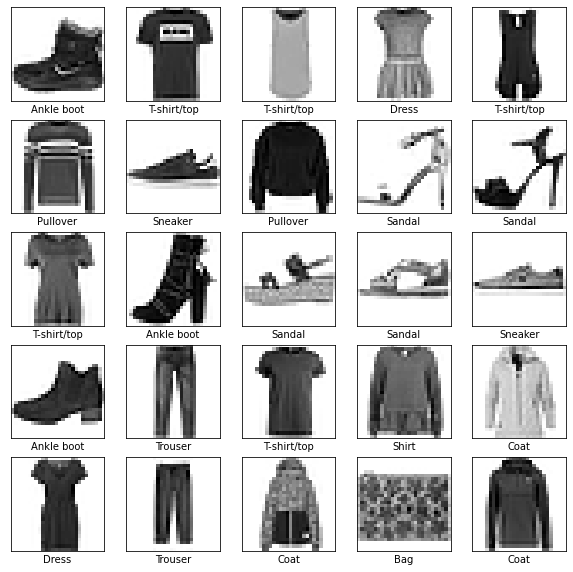

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Normalize to float between 0 and 1
# Original pixel values are between 0 and 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 тренировочные примеры
10000 тестовые примеры


In [5]:
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
accuracy_di = {}

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для вывода результатов
epoch = np.arange(epochs+1)

# будем изменять количество нейронов
for i_optim in [ 32 ]:
  # создаем рабочую модель model_neuron
  model_neuron = Sequential()
  model_neuron.add(Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])))
  #model_neuron.add(MaxPool2D((3,3), padding='same'))
  for i in range(3):
    model_neuron.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model_neuron.add(MaxPool2D((3,3),padding="same"))
  model_neuron.add(Flatten())
  model_neuron.add(Dense(512, activation='relu'))
  model_neuron.add(Dropout(0.25))
  model_neuron.add(Dense(256, activation="relu"))
  model_neuron.add(Dropout(0.25))
  model_neuron.add(Dense(num_classes, activation='softmax'))
  
  # компилируем modeli с одним из оптимизаторов
  model_neuron.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  
  model_neuron.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 2, 2, 64)        

<Figure size 1152x504 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,7))

# вычисляем ошибку для modeli без обучения
hh0_tr = model_neuron.evaluate(x_train[:48000,:], y_train[:48000],verbose = 0)
hh0_val = model_neuron.evaluate(x_train[48000:,:], y_train[48000:],verbose = 0)
# проводим обучение модели 
hh = model_neuron.fit(x_train, y_train, epochs=epochs,
                batch_size=32, validation_split=0.2, verbose = 0
                )
# картинки  
units = str(model_neuron.get_config()['layers'][-3]['config']['units'])

plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label ='training')
plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label ='validation')

max_acc = np.argmax(hh.history['val_accuracy'])
accuracy_di[units+' neurons'] = np.round(hh.history['val_accuracy'][max_acc],2)
  
plt.legend()
plt.grid('On')

plt.title('Сравнения количества нейронов')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

print(accuracy_di)

In [23]:
model_neuron.evaluate(x_train[:48000],y_train[:48000])

1500/1500 [==============================] - 9s 6ms/step - loss: 2.3026 - accuracy: 0.0999


[2.302626132965088, 0.09987500309944153]

In [ ]:
print(accuracy_di)

{'64 neurons': 0.89, '128 neurons': 0.9, '256 neurons': 0.89, 'SGD': 0.87, 'RMSProp': 0.89, 'adam': 0.89, 'NAdam': 0.89, '2 layers': 0.89, '3 layers': 0.89, '5 layers': 0.89, '10 layers': 0.89}


Посмотрим на результат предсказаний  (inference) для обученной модели (последняя в цикле)

In [ ]:
N = 15
y_pred = model_opti.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
y_pred_opti = model_layer.predict(test_images[:N,:]                            )

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

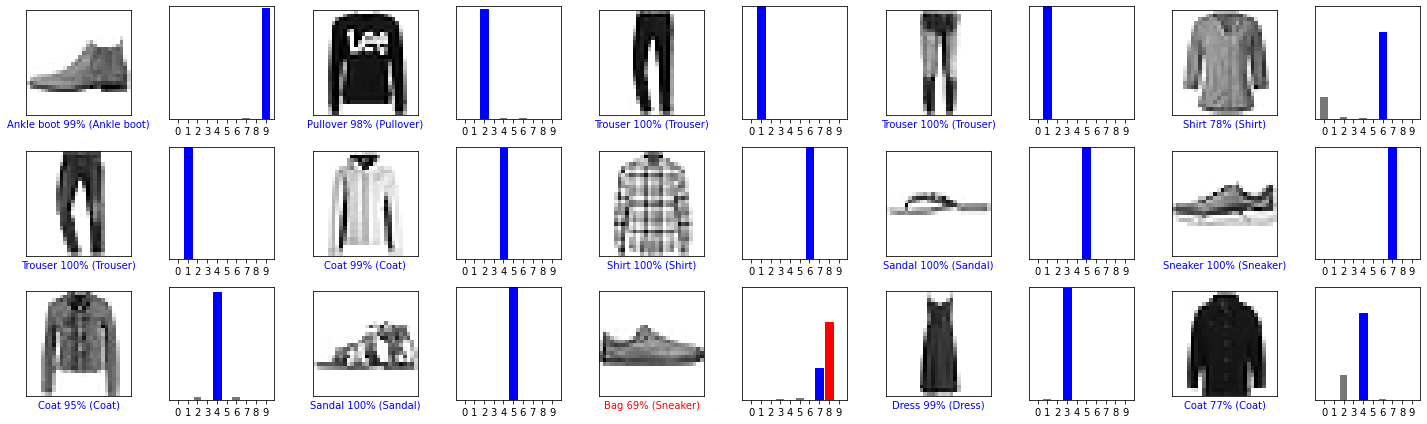

In [ ]:
num_rows = int(N/5)
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred[i], test_labels, test_imagesi)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred[i], test_labels)
plt.tight_layout()
plt.show()

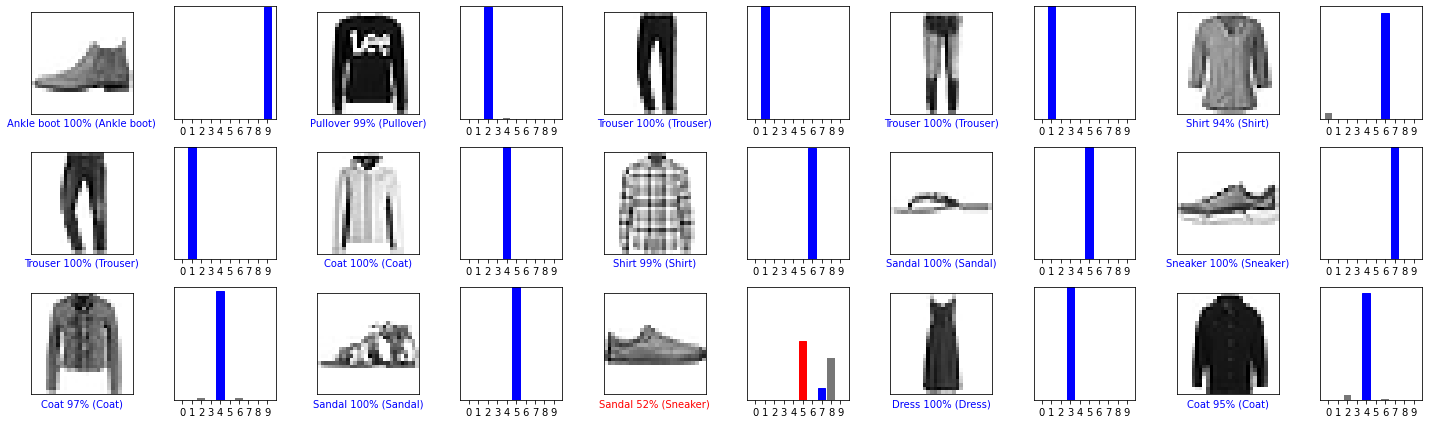

In [ ]:
num_rows = int(N/5)
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred_opti[i], test_labels, test_imagesi)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred_opti[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
pd.DataFrame.from_dict(accuracy_di, orient="index", columns=["accuracy"])

,accuracy
64 neurons,0.89
128 neurons,0.90
256 neurons,0.89
SGD,0.87
RMSProp,0.89
adam,0.89
NAdam,0.89
2 layers,0.89
3 layers,0.89
5 layers,0.89
